# Импорт библиотек

Перед началом работы были импортированы все необходимые библиотеки.

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, balanced_accuracy_score, f1_score, confusion_matrix
pd.set_option('display.max_columns', None)

# Загрузка датасета и предобработка данных

Далее был загружен набор данных соответствующий первому варианту.
Датасет одержит информацию о сердечных болезнях
1. возраст
2. пол
3. тип боли в груди:(4 значения [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP:
неангинальная боль, ASY: бессимптомная])
4. артериальное давление в покое
5. холестерин сыворотки в мг/дл
6. уровень сахара в крови натощак > 120 мг/дл
7. ЭКГ в покое: результаты электрокардиограммы в покое (норма: нормальная, ST: аномалия LVH: гипертрофия)
8. MaxHR максимальная достигнутая частота сердечных сокращений (Числовое значение от 60 до 202)
9. стенокардия, вызванная физической нагрузкой (да, нет)
10. oldpeak = депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
11. наклон пикового сегмента ST при нагрузке Вверх: восходящий, Плоский: плоский, Вниз: нисходящий)
12. HeartDisease: выходной класс [1: болезнь сердца, 0: нормальный]

In [192]:
df = pd.read_csv('1heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
920,38,M,NAP,138.0,175,0,Normal,173.0,N,0.0,Up,0
921,38,M,NAP,138.0,175,0,NaN,173.0,N,0.0,Up,0
922,57,F,ASY,140.0,a241,0,Normal,123.0,Y,0.2,Flat,1
923,55,F,ATA,132.0,342,0,Normal,NaN,N,1.2,Up,0


Далее была произведена предобработка данных.

Уровень холестерина имеет неправильный тип данных, имеются единичные пропуски в переменных: Cholesterol, RestingBP, RestingECG, MaxHR.

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             925 non-null    int64  
 1   Sex             925 non-null    object 
 2   ChestPainType   925 non-null    object 
 3   RestingBP       923 non-null    float64
 4   Cholesterol     924 non-null    object 
 5   FastingBS       925 non-null    int64  
 6   RestingECG      924 non-null    object 
 7   MaxHR           924 non-null    float64
 8   ExerciseAngina  925 non-null    object 
 9   Oldpeak         925 non-null    float64
 10  ST_Slope        925 non-null    object 
 11  HeartDisease    925 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 86.8+ KB


Выведены уникальные значение в каждом из столбцов, чтобы избавиться от ошибок в данных. 
- В столбце Sex некоторые переменные были названы 'Ma', они были заменены на 'M'.
- Последний элемент в столбце Cholesterol на рисунке ниже равен 'a241', что можно интерпретировать как ошибка при вводе данных. Следовательно, он был заменён на 241, а столбец приведён к численному типу данных.
- В столбце Oldpeak были негативные значения, чего быть не может. Эти значения были заменены на положительные.
- В столбце ST_Slope некоторые переменные были названы 'UP', они были заменены на 'Up'.

In [194]:
for column in df.columns:
    print(df[column].unique(), column, '\n')

[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71] Age 

['M' 'F' 'Ma'] Sex 

['ATA' 'NAP' 'ASY' 'TA'] ChestPainType 

[140. 160. 130. 138. 150. 120. 110. 136. 115.  nan 100. 124. 113. 125.
 145. 112. 132. 118. 170. 142. 190. 135. 180. 108. 155. 128. 106.  92.
 200. 122.  98. 105. 133.  95.  80. 137. 185. 165. 126. 152. 116.   0.
 144. 154. 134. 104. 139. 131. 141. 178. 146. 158. 123. 102.  96. 143.
 172. 156. 114. 127. 101. 174.  94. 148. 117. 192. 129. 164.] RestingBP 

['289' '180' '283' '214' '195' '339' '237' '208' '207' '284' '211' '164'
 '204' '234' '273' '196' nan '248' '267' '223' '184' '201' '288' '215'
 '209' '260' '468' '188' '518' '167' '224' '172' '186' '254' '306' '250'
 '177' '227' '230' '294' '264' '259' '175' '318' '216' '340' '233' '205'
 '245' '194' '270' '213' '365' '342' '253' '277' '202' '297' '225' '246'
 '412' '265' '182' '218' '268' '163' '529' '100' '206' '2

In [195]:
df.loc[df['Cholesterol'] == 'a241', 'Cholesterol'] = 241
df['Cholesterol'] = df['Cholesterol'].astype('float')
df.loc[df['Sex'] == 'Ma', 'Sex'] = 'M'
df['Oldpeak'] = df['Oldpeak'].apply(abs)
df.loc[df['ST_Slope'] == 'UP', 'ST_Slope'] = 'Up'

Перед заполнением пропусков необходимо рассмотреть выбросы с помощью рисунка ниже.
- RestingBP в теории, может принимать значение 200, но точно не может принимать значение 0.
- Аналогично с Cholesterol.
- Oldpeak, в теории, может принимать большие значения

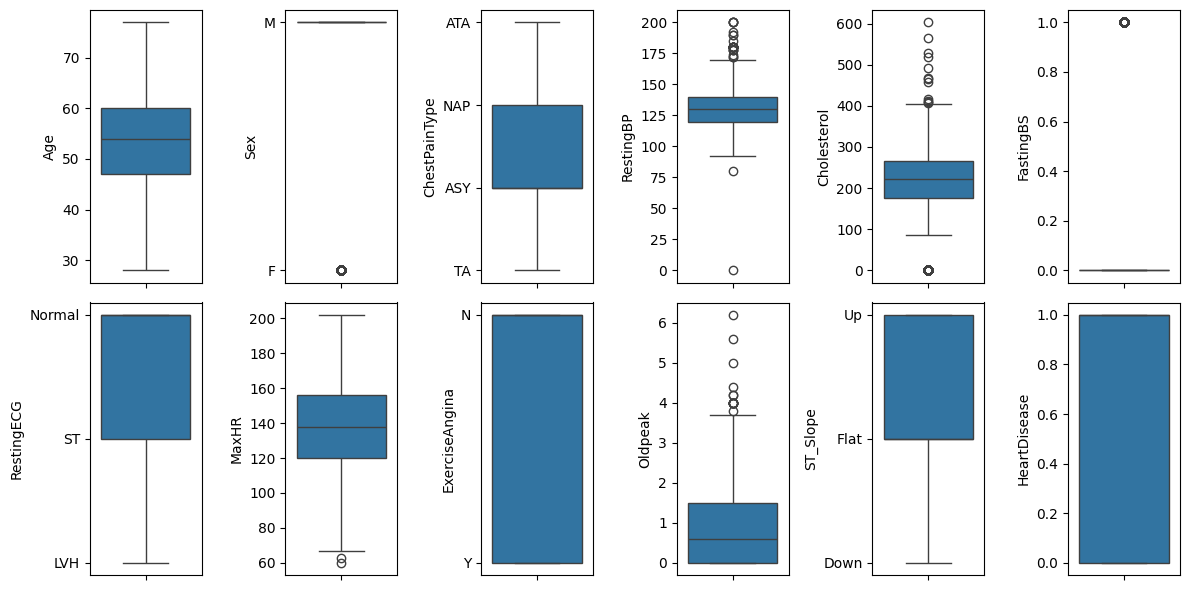

In [196]:
fig, axs = plt.subplots(2, 6, figsize=(12, 6))
for ax, column in zip(axs.reshape(-1), df.columns):
    sns.boxplot(df, y=column, ax=ax, legend=False)
fig.tight_layout()

Как показано ниже, выбросы влияют на целевую переменную. Поэтому было принято решение удалить только очевидные ошибки в данных, где уровень холестерина и давление равняются 0, а остальные выбросы оставить.

In [197]:
print(
df[df['Oldpeak'] > 4]['HeartDisease'].mean(),
df[df['RestingBP'] > 180]['HeartDisease'].mean(),
df[df['Cholesterol'] > 400]['HeartDisease'].mean(),
df[df['MaxHR'] < 70]['HeartDisease'].mean())

0.8333333333333334 0.875 0.6153846153846154 0.75


In [198]:
df = df[df['Cholesterol'] > 10]
df = df[df['RestingBP'] > 10]

Выведены пропуски в данных. Как видно из рисунка ниже, их достаточно мало (<10%) и в датасете нет большого количества выбросов(см. ниже), поэтому можем пропуски средним значением в числовых пропусках и модой в категориальных.

In [199]:
df[df.isna().any(axis=1)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
921,38,M,NAP,138.0,175.0,0,NaN,173.0,N,0.0,Up,0
923,55,F,ATA,132.0,342.0,0,Normal,NaN,N,1.2,Up,0


In [200]:
for column in df.columns:
    if df[column].dtype == 'O':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())

Далее была произведена one-hot кодировка категориальных данных. Выбор кодировки основан на том, что в датасете нет категориальных признаков с большим количеством уникальных значений, а там, где их больше 2-ух, нельзя установить их чёткий порядок.

In [201]:
df_encoded = pd.get_dummies(df)
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172.000000,0.0,0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160.0,180.0,0,156.000000,1.0,1,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98.000000,0.0,0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138.0,214.0,0,108.000000,1.5,1,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150.0,195.0,0,122.000000,0.0,0,False,True,False,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,38,138.0,175.0,0,173.000000,0.0,0,False,True,False,False,True,False,False,True,False,True,False,False,False,True
921,38,138.0,175.0,0,173.000000,0.0,0,False,True,False,False,True,False,False,True,False,True,False,False,False,True
922,57,140.0,241.0,0,123.000000,0.2,1,True,False,True,False,False,False,False,True,False,False,True,False,True,False
923,55,132.0,342.0,0,140.378667,1.2,0,True,False,False,True,False,False,False,True,False,True,False,False,False,True


Далее было произведено разделение на целевую и независимые переменные. Целевая переменная - HeartDisease, она не будет использоваться при обучении.

In [202]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Матрица диаграмм рассеяния

Была построена матрица диаграмм рассеяния, которая показывает, что при увеличении возраста и депрессии ST, уменьшении максимальной частоты сердцебиения увеличивается шанс сердечных заболеваний.

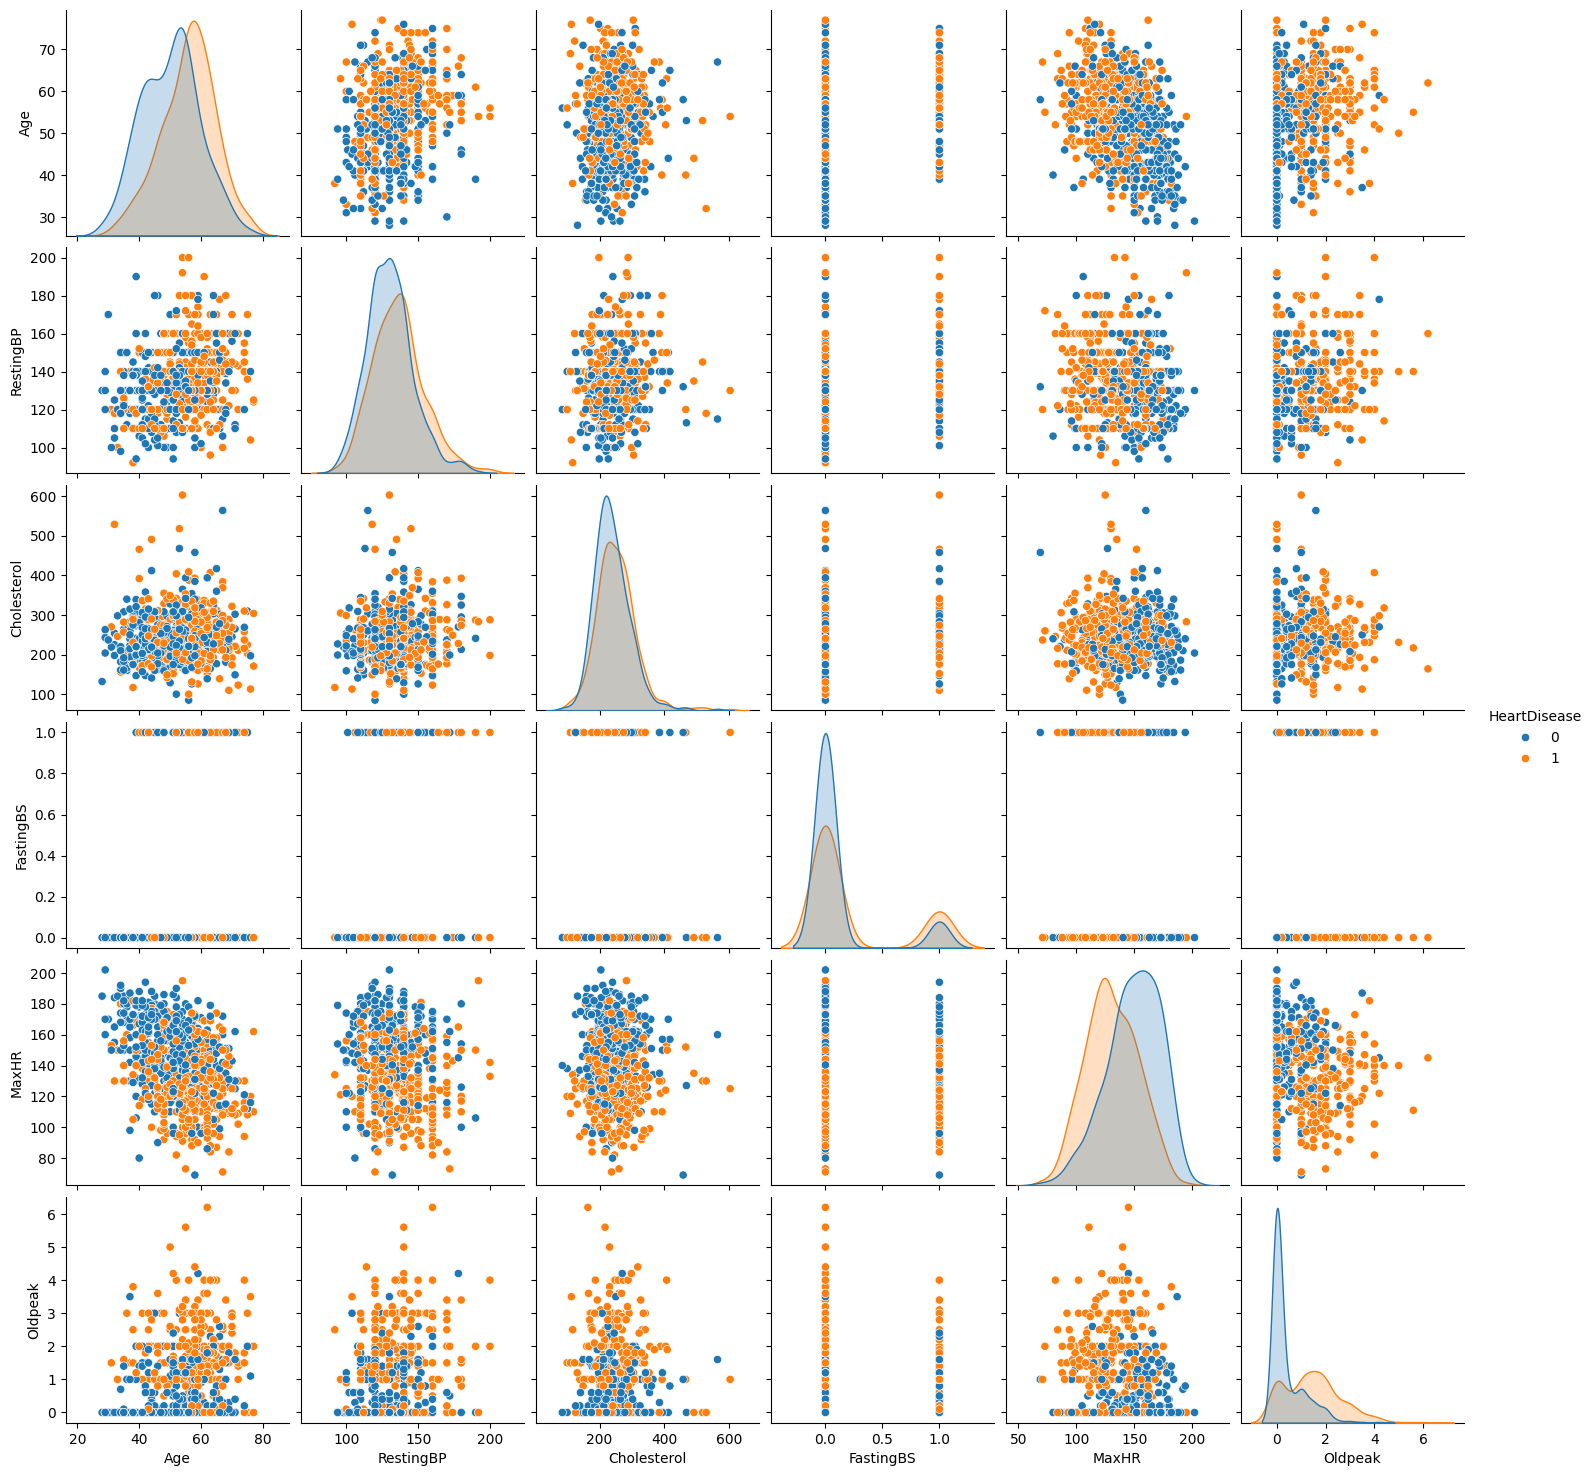

In [203]:
sns.pairplot(df, hue = 'HeartDisease')

# Обучение моделей

Далее были обучены модели классификации:
- K-ближайших соседей
- Дерево решений
- Логистическая регрессия
- Случайный лес

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
knn = Pipeline((('scaler', StandardScaler()), ('knn', KNeighborsClassifier(15, weights='distance')))).fit(X_train, y_train)
tree = Pipeline((('scaler', StandardScaler()), ('tree', DecisionTreeClassifier(max_depth=3)))).fit(X_train, y_train)
logreg = Pipeline((('scaler', StandardScaler()), ('logreg', LogisticRegression()))).fit(X_train, y_train)
forest = Pipeline((('scaler', StandardScaler()), ('forest', RandomForestClassifier()))).fit(X_train, y_train)

# Оценка моделей

Из матриц неточностей можно сделать следующие выводы:
- Наибольший precision у logreg, наименьший у tree
- Наибольший recall у forest, наименьший у tree, knn
- Наибольший accuracy у logreg, наименьший у tree

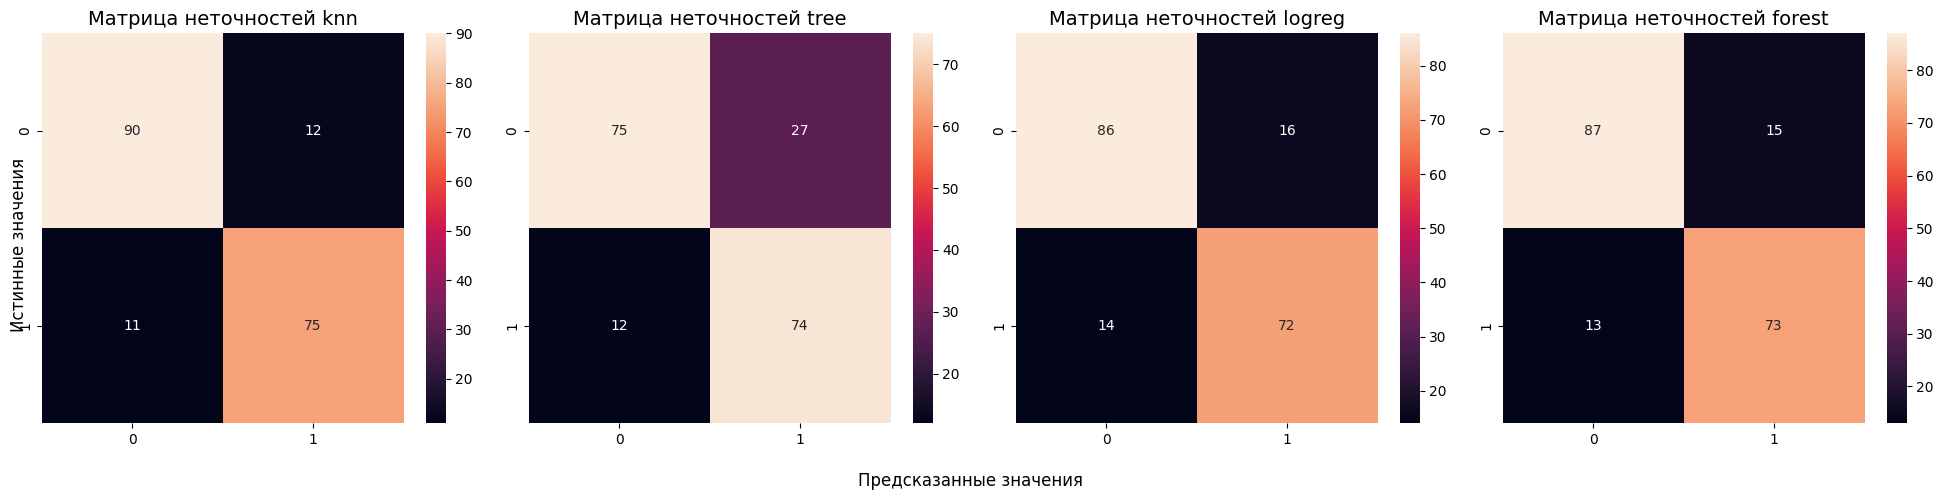

In [205]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, pipe in enumerate([knn, tree, logreg, forest]):
    sns.heatmap(confusion_matrix(y_test, pipe.predict(X_test)), annot=True, ax=axs[i])
    axs[i].set_title(f"Матрица неточностей {list(pipe.named_steps.keys())[1]}", fontsize=14);
fig.supxlabel('Предсказанные значения')
fig.supylabel('Истинные значения')
plt.tight_layout()

Исходя из метрики F1, можем сделать вывод, что лучшими методами оказались случайный лес и логистическая регрессия.

Но если важна точность предсказания, то лучше будет выбрать логистическую регрессию за счёт большего precision. Если важна полнота, то лучше будет выбрать случайный лес, за счёт лучшего recall.

Так как классы в датасете примерно сбалансированы, то balanced_accuracy практически не отличается от обычного accuracy и не имеет большого смысла.

In [206]:
for pipe in ([knn, tree, logreg, forest]):
    print(list(pipe.named_steps.keys())[1])
    print('accuracy:', accuracy_score(y_test, pipe.predict(X_test)))
    print('recall:', recall_score(y_test, pipe.predict(X_test)))
    print('precision:', precision_score(y_test, pipe.predict(X_test)))
    print('balanced_accuracy:', balanced_accuracy_score(y_test, pipe.predict(X_test)))
    print('f1_score:', f1_score(y_test, pipe.predict(X_test)))
    print('\n')

knn
accuracy: 0.8776595744680851
recall: 0.872093023255814
precision: 0.8620689655172413
balanced_accuracy: 0.8772229822161423
f1_score: 0.8670520231213873


tree
accuracy: 0.7925531914893617
recall: 0.8604651162790697
precision: 0.7326732673267327
balanced_accuracy: 0.7978796169630643
f1_score: 0.7914438502673797


logreg
accuracy: 0.8404255319148937
recall: 0.8372093023255814
precision: 0.8181818181818182
balanced_accuracy: 0.8401732786137711
f1_score: 0.8275862068965517


forest
accuracy: 0.851063829787234
recall: 0.8488372093023255
precision: 0.8295454545454546
balanced_accuracy: 0.8508891928864568
f1_score: 0.8390804597701149




# ROC - кривая

По ROC кривой можно заметить, что решающее дерево отличается от остальных моделей по площади под графиком, особенно в районе границы шанса в районе 0.7-0.9. В целом, каждая модель хорошо себя показывает в данной задаче.

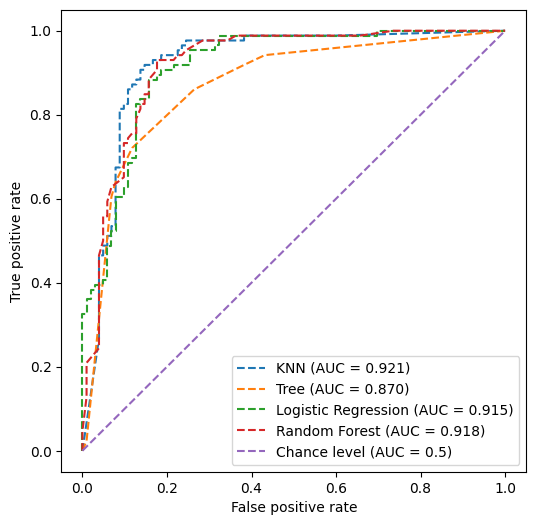

In [207]:
fig, ax = plt.subplots(figsize=(6, 6))
for model, pipe in zip((('KNN', 'Tree', 'Logistic Regression', 'Random Forest')), (knn, tree, logreg, forest)):
    auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])
    fpr, tpr, _ = roc_curve(y_test, pipe.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, linestyle='--', label=f'{model} (AUC = %0.3f)' % auc)
plt.plot([0, 1],[0, 1], '--', label='Chance level (AUC = 0.5)')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# Вывод

Вывод:
- В ходе работы была выполнена задача классификации на датасете с данными о сердечных заболеваниях. Целевая переменная - наличие сердечного заболевания. 
- В ходе предобработки данных были исправлены ошибки в типах данных и названиях категорий, удалены выбросы и заполнены пропуски.
- Для категориальных данных была выполнена one-hot кодировка для того, чтобы не упустить важную информацию в тех категориях, где нет чёткой иерархии.
- Данные были разбиты на тренировочную и тестовую выборки для того, чтобы объективно оценить модели, а в числовых переменных произведена стандартизация, для правильной работы модели KNN.
- Далее модели обучены, и оценены с помощью различных метрик. Лучшими моделями оказались случайный лес и логистическая регрессия.
- Также была построена ROC-кривая, позволяющая оценить поведение модели при разных порогах вероятности классификации.